In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split as tts, GridSearchCV, KFold
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from imblearn.over_sampling import SMOTE
from datetime import datetime as dt
# from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [3]:
df1= pd.read_csv('Hospitalisation details.csv')
df1.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [5]:
df2= pd.read_csv('Medical Examinations.csv')
df2.head()

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [7]:
df3= pd.read_excel('Names.xlsx')

In [8]:
len(df2)

2335

In [9]:
len(df1)

2343

In [10]:
df1['Customer ID'].nunique()

2338

In [11]:
df2['Customer ID'].nunique()

2335

In [12]:
df2['Customer ID'].value_counts()

Customer ID
Id1       1
Id1534    1
Id1554    1
Id1555    1
Id1556    1
         ..
Id780     1
Id781     1
Id782     1
Id783     1
Id2335    1
Name: count, Length: 2335, dtype: int64

In [13]:
df1['Customer ID'].value_counts()

Customer ID
?         6
Id2335    1
Id774     1
Id780     1
Id779     1
         ..
Id1555    1
Id1554    1
Id1553    1
Id1552    1
Id1       1
Name: count, Length: 2338, dtype: int64

In [21]:
df= df1.merge(df2.merge(df3, on='Customer ID', how='outer'), on='Customer ID', how='outer')
df.head(10)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,?,2004,Nov,6,0,1137.01,tier - 3,tier - 1,R1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,?,1999,Jun,9,1,2775.19,tier - 2,tier - 1,R1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,?,1985,Dec,20,2,6203.90,tier - 1,tier - 2,R1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,?,2000,Oct,13,0,35585.58,tier - 1,tier - 2,R1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,?,1992,Oct,6,0,36837.47,tier - 1,tier - 2,R1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,?,1991,Nov,22,2,38711.00,tier - 1,tier - 3,R1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Id1,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.41,7.47,No,No,No,No major surgery,yes,"Hawks, Ms. Kelly"
7,Id10,1978,Dec,29,0,48885.14,tier - 1,tier - 2,R1013,38.06,10.79,No,No,No,No major surgery,yes,"Benner, Ms. Brooke N."
8,Id100,1977,Jun,27,2,40284.38,tier - 1,tier - 3,R1012,48.20,4.84,No,No,No,No major surgery,yes,"Gollins, Mr. Daniel"
9,Id1000,1989,Dec,17,3,11250.43,tier - 3,tier - 2,R1026,39.17,4.15,No,No,No,No major surgery,No,"Schaefer, Mrs. Stephanie A"


In [23]:
df[df.year=='?']

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
325,Id1286,?,Dec,12,1,8547.69,tier - 2,tier - 1,R1013,29.37,8.01,yes,No,No,1,No,"Ainsley, Ms. Katie M."
328,Id1289,?,Jul,24,0,8534.67,tier - 2,tier - 3,R1024,24.32,11.56,yes,No,No,1,No,"Levine, Ms. Annie J."


In [25]:
df[df.month=='?']

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
1472,Id2318,1996,?,18,0,770.38,tier - 3,?,R1012,18.820,5.51,yes,No,No,No major surgery,No,"Gagnon, Ms. Candice M"
1477,Id2322,2002,?,19,0,750.00,tier - 3,tier - 1,R1012,21.380,8.01,No,No,No,No major surgery,No,"Street, Ms. Holly"
1564,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes,"Lu, Mr. Phil"


In [27]:
df.isnull().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       8
HBA1C                     8
Heart Issues              8
Any Transplants           8
Cancer history            8
NumberOfMajorSurgeries    8
smoker                    8
name                      8
dtype: int64

In [29]:
100* 17 / len(df)

0.7255655142979086

In [31]:
df[df['smoker'].isnull()]

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,?,2004,Nov,6,0,1137.01,tier - 3,tier - 1,R1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,?,1999,Jun,9,1,2775.19,tier - 2,tier - 1,R1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,?,1985,Dec,20,2,6203.90,tier - 1,tier - 2,R1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,?,2000,Oct,13,0,35585.58,tier - 1,tier - 2,R1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,?,1992,Oct,6,0,36837.47,tier - 1,tier - 2,R1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,?,1991,Nov,22,2,38711.00,tier - 1,tier - 3,R1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2341,id2444,1987,Nov,27,2,20984.09,tier - 2,tier - 2,R1015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2342,id3444,2004,Nov,1,2,34303.17,tier - 1,tier - 3,R1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df= df.dropna()

In [35]:
df.describe()

,date,children,charges,BMI,HBA1C
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,15.563597,1.025696,13529.918034,30.972649,6.578998
std,8.720508,1.234754,11898.654299,8.742095,2.228731
min,1.000000,0.000000,563.840000,15.010000,4.000000
25%,8.000000,0.000000,5084.010000,24.600000,4.900000
50%,15.000000,0.000000,9630.910000,30.400000,5.810000
75%,23.000000,2.000000,16912.295000,36.300000,7.955000
max,30.000000,5.000000,63770.430000,55.050000,12.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 6 to 2340
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   year                    2335 non-null   object 
 2   month                   2335 non-null   object 
 3   date                    2335 non-null   int64  
 4   children                2335 non-null   int64  
 5   charges                 2335 non-null   float64
 6   Hospital tier           2335 non-null   object 
 7   City tier               2335 non-null   object 
 8   State ID                2335 non-null   object 
 9   BMI                     2335 non-null   float64
 10  HBA1C                   2335 non-null   float64
 11  Heart Issues            2335 non-null   object 
 12  Any Transplants         2335 non-null   object 
 13  Cancer history          2335 non-null   object 
 14  NumberOfMajorSurgeries  2335 non-null   objec

In [39]:
df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
6,Id1,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.41,7.47,No,No,No,No major surgery,yes,"Hawks, Ms. Kelly"
7,Id10,1978,Dec,29,0,48885.14,tier - 1,tier - 2,R1013,38.06,10.79,No,No,No,No major surgery,yes,"Benner, Ms. Brooke N."
8,Id100,1977,Jun,27,2,40284.38,tier - 1,tier - 3,R1012,48.20,4.84,No,No,No,No major surgery,yes,"Gollins, Mr. Daniel"
9,Id1000,1989,Dec,17,3,11250.43,tier - 3,tier - 2,R1026,39.17,4.15,No,No,No,No major surgery,No,"Schaefer, Mrs. Stephanie A"
10,Id1001,1969,Dec,30,2,11244.38,tier - 3,tier - 1,R1016,26.41,5.99,yes,No,Yes,1,No,"D'Alessandro, Mr. Patrick"


In [41]:
df.columns

Index(['Customer ID', 'year', 'month', 'date', 'children', 'charges',
       'Hospital tier', 'City tier', 'State ID', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'name'],
      dtype='object')

In [43]:
df.columns= ['customer_id', 'year', 'month', 'date', 'children', 'charges',
       'hospital_tier', 'city_tier', 'state_id', 'bmi', 'hb1ac',
       'heart_issues', 'any_transplants', 'cancer_history',
       'number_of_major_surgeries', 'smoker', 'name']

In [45]:
df= df.drop('customer_id',axis=1)
df.head()

,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,hb1ac,heart_issues,any_transplants,cancer_history,number_of_major_surgeries,smoker,name
6,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.41,7.47,No,No,No,No major surgery,yes,"Hawks, Ms. Kelly"
7,1978,Dec,29,0,48885.14,tier - 1,tier - 2,R1013,38.06,10.79,No,No,No,No major surgery,yes,"Benner, Ms. Brooke N."
8,1977,Jun,27,2,40284.38,tier - 1,tier - 3,R1012,48.20,4.84,No,No,No,No major surgery,yes,"Gollins, Mr. Daniel"
9,1989,Dec,17,3,11250.43,tier - 3,tier - 2,R1026,39.17,4.15,No,No,No,No major surgery,No,"Schaefer, Mrs. Stephanie A"
10,1969,Dec,30,2,11244.38,tier - 3,tier - 1,R1016,26.41,5.99,yes,No,Yes,1,No,"D'Alessandro, Mr. Patrick"


In [47]:
df.number_of_major_surgeries.value_counts()

number_of_major_surgeries
No major surgery    1074
1                    965
2                    274
3                     22
Name: count, dtype: int64

In [49]:
df[df.state_id=='?']

,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,hb1ac,heart_issues,any_transplants,cancer_history,number_of_major_surgeries,smoker,name
785,2000,Sep,5,1,37165.16,tier - 1,tier - 3,?,37.620,6.32,yes,yes,No,2,yes,"Torphy, Mr. Bobby"
888,1995,Dec,1,3,4827.90,tier - 1,tier - 2,?,18.905,4.91,yes,No,No,1,No,"Capriolo, Mr. Michael"


In [51]:
df[df.city_tier=='?']

,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,hb1ac,heart_issues,any_transplants,cancer_history,number_of_major_surgeries,smoker,name
1472,1996,?,18,0,770.38,tier - 3,?,R1012,18.82,5.51,yes,No,No,No major surgery,No,"Gagnon, Ms. Candice M"


In [53]:
df[df.hospital_tier=='?']

,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,hb1ac,heart_issues,any_transplants,cancer_history,number_of_major_surgeries,smoker,name
1479,1999,Dec,26,0,700.0,?,tier - 3,R1013,22.24,5.04,No,No,No,No major surgery,No,"Duffy, Ms. Meghan K"


In [55]:
df[df.smoker=='?']

,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,hb1ac,heart_issues,any_transplants,cancer_history,number_of_major_surgeries,smoker,name
1854,1994,Jul,1,3,17663.14,tier - 1,tier - 3,R1013,23.980,4.90,No,No,No,No major surgery,?,"Pearlman, Mr. Oz"
1937,2004,Jul,17,0,15518.18,tier - 2,tier - 3,R1015,25.175,4.96,No,yes,No,1,?,"Bruns, Mr. Zachary T"


In [57]:
df[['city_tier','hospital_tier','charges']].groupby(['city_tier','hospital_tier']).mean()

charges
city_tier hospital_tier              
?         tier - 3         770.380000
tier - 1  tier - 1       29519.600814
          tier - 2       11508.067079
          tier - 3        9775.389793
tier - 2  tier - 1       28788.457477
          tier - 2       11973.655344
          tier - 3        9283.427477
tier - 3  ?                700.000000
          tier - 1       31893.925676
          tier - 2       12093.369163
          tier - 3        9342.179912

In [59]:
df= df[(df.city_tier!='?') & (df.hospital_tier!='?') & (df.smoker!='?') & (df.state_id!='?') & (df.year!='?') & (df.month!='?')]

In [61]:
# df= df.drop('month',axis=1)

In [63]:
df['number_of_major_surgeries']= df['number_of_major_surgeries'].replace('No major surgery','0').astype(int)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2325 entries, 6 to 2340
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       2325 non-null   object 
 1   month                      2325 non-null   object 
 2   date                       2325 non-null   int64  
 3   children                   2325 non-null   int64  
 4   charges                    2325 non-null   float64
 5   hospital_tier              2325 non-null   object 
 6   city_tier                  2325 non-null   object 
 7   state_id                   2325 non-null   object 
 8   bmi                        2325 non-null   float64
 9   hb1ac                      2325 non-null   float64
 10  heart_issues               2325 non-null   object 
 11  any_transplants            2325 non-null   object 
 12  cancer_history             2325 non-null   object 
 13  number_of_major_surgeries  2325 non-null   int32  
 1

In [67]:
df_cat= pd.get_dummies(df[['hospital_tier','city_tier','state_id','heart_issues','any_transplants','cancer_history',
                          'smoker']],dtype='int')

In [69]:
df_num= df[['name','year','month','date','children','charges','bmi','hb1ac','number_of_major_surgeries']]

In [71]:
df_num.date= df_num.date.astype(str)

C:\Users\hriti\AppData\Local\Temp\ipykernel_21180\22386556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.date= df_num.date.astype(str)


In [73]:
df= df_num.merge(df_cat,right_index=True,left_index=True)

In [75]:
df.columns

Index(['name', 'year', 'month', 'date', 'children', 'charges', 'bmi', 'hb1ac',
       'number_of_major_surgeries', 'hospital_tier_tier - 1',
       'hospital_tier_tier - 2', 'hospital_tier_tier - 3',
       'city_tier_tier - 1', 'city_tier_tier - 2', 'city_tier_tier - 3',
       'state_id_R1011', 'state_id_R1012', 'state_id_R1013', 'state_id_R1014',
       'state_id_R1015', 'state_id_R1016', 'state_id_R1017', 'state_id_R1018',
       'state_id_R1019', 'state_id_R1020', 'state_id_R1021', 'state_id_R1022',
       'state_id_R1023', 'state_id_R1024', 'state_id_R1025', 'state_id_R1026',
       'heart_issues_No', 'heart_issues_yes', 'any_transplants_No',
       'any_transplants_yes', 'cancer_history_No', 'cancer_history_Yes',
       'smoker_No', 'smoker_yes'],
      dtype='object')

In [77]:
df= df.drop(['state_id_R1014','state_id_R1015', 'state_id_R1016', 'state_id_R1017', 'state_id_R1018',
       'state_id_R1019', 'state_id_R1020', 'state_id_R1021', 'state_id_R1022',
       'state_id_R1023', 'state_id_R1024', 'state_id_R1025', 'state_id_R1026',
        'hospital_tier_tier - 1','city_tier_tier - 1','heart_issues_No','any_transplants_No',
        'cancer_history_No','smoker_No'], axis=1)

In [79]:
df['sex_f']= df['name'].str.contains('Mr.').replace({True:0,False:1})

C:\Users\hriti\AppData\Local\Temp\ipykernel_21180\2380237369.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex_f']= df['name'].str.contains('Mr.').replace({True:0,False:1})


In [81]:
df= df.drop('name',axis=1)

In [83]:
df['dob']= df['date']+' '+df['month']+', '+df['year']

In [85]:
df['dob']= pd.to_datetime(df['dob'])

In [87]:
df['age']= ((dt.now()- df['dob']).dt.days/365).astype(int)

In [89]:
df= df.drop(['dob','month','date','year'],axis=1)

In [91]:
df.head()

,children,charges,bmi,hb1ac,number_of_major_surgeries,hospital_tier_tier - 2,hospital_tier_tier - 3,city_tier_tier - 2,city_tier_tier - 3,state_id_R1011,state_id_R1012,state_id_R1013,heart_issues_yes,any_transplants_yes,cancer_history_Yes,smoker_yes,sex_f,age
6,0,63770.43,47.41,7.47,0,0,0,0,1,0,0,1,0,0,0,1,1,56
7,0,48885.14,38.06,10.79,0,0,0,1,0,0,0,1,0,0,0,1,1,45
8,2,40284.38,48.20,4.84,0,0,0,0,1,0,1,0,0,0,0,1,0,47
9,3,11250.43,39.17,4.15,0,0,1,1,0,0,0,0,0,0,0,0,0,34
10,2,11244.38,26.41,5.99,1,0,1,0,0,0,0,0,1,0,1,0,0,54


In [93]:
visual_df= df1.merge(df2.merge(df3, on='Customer ID', how='outer'), on='Customer ID', how='outer')

In [95]:
visual_df.columns= ['customer_id', 'year', 'month', 'date', 'children', 'charges',
       'hospital_tier', 'city_tier', 'state_id', 'bmi', 'hb1ac',
       'heart_issues', 'any_transplants', 'cancer_history',
       'number_of_major_surgeries', 'smoker', 'name']

In [97]:
visual_df= visual_df.loc[df.index]

In [99]:
visual_df['sex_f']= df['sex_f']
visual_df['age']= df['age']

In [101]:
visual_df.head()

,customer_id,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,hb1ac,heart_issues,any_transplants,cancer_history,number_of_major_surgeries,smoker,name,sex_f,age
6,Id1,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.41,7.47,No,No,No,No major surgery,yes,"Hawks, Ms. Kelly",1,56
7,Id10,1978,Dec,29,0,48885.14,tier - 1,tier - 2,R1013,38.06,10.79,No,No,No,No major surgery,yes,"Benner, Ms. Brooke N.",1,45
8,Id100,1977,Jun,27,2,40284.38,tier - 1,tier - 3,R1012,48.20,4.84,No,No,No,No major surgery,yes,"Gollins, Mr. Daniel",0,47
9,Id1000,1989,Dec,17,3,11250.43,tier - 3,tier - 2,R1026,39.17,4.15,No,No,No,No major surgery,No,"Schaefer, Mrs. Stephanie A",0,34
10,Id1001,1969,Dec,30,2,11244.38,tier - 3,tier - 1,R1016,26.41,5.99,yes,No,Yes,1,No,"D'Alessandro, Mr. Patrick",0,54


<Axes: ylabel='charges'>

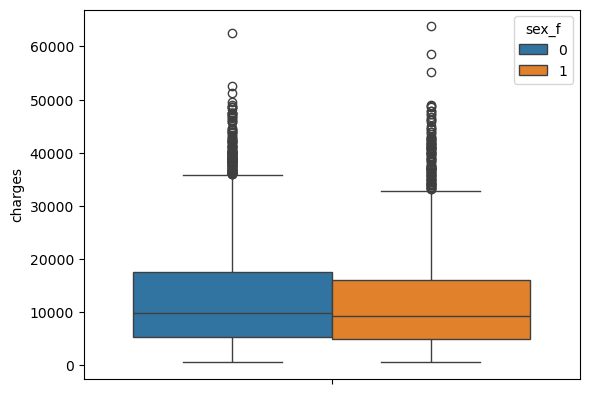

In [103]:
sns.boxplot(data=visual_df, y='charges',hue='sex_f')

<Axes: xlabel='charges', ylabel='Count'>

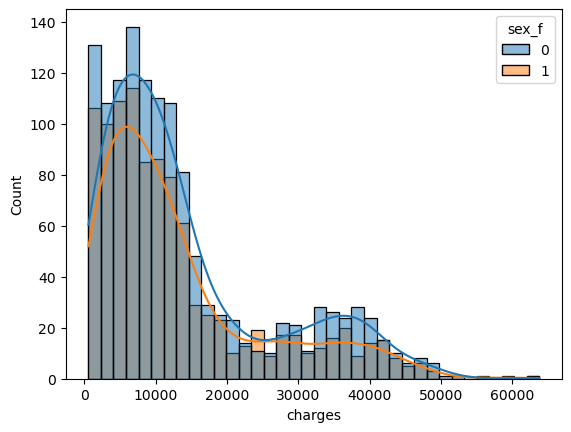

In [105]:
sns.histplot(data=visual_df, x='charges',kde=True,hue='sex_f')

<Axes: ylabel='charges'>

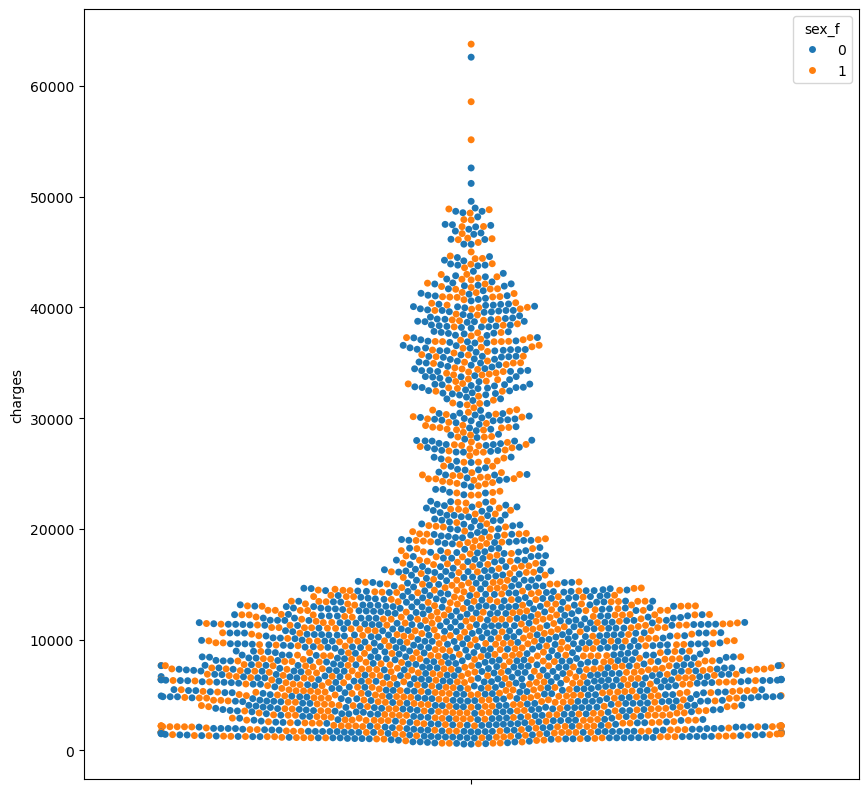

In [106]:
plt.figure(figsize=(10,10))
sns.swarmplot(data=visual_df, y='charges',hue='sex_f')

<Axes: ylabel='charges'>

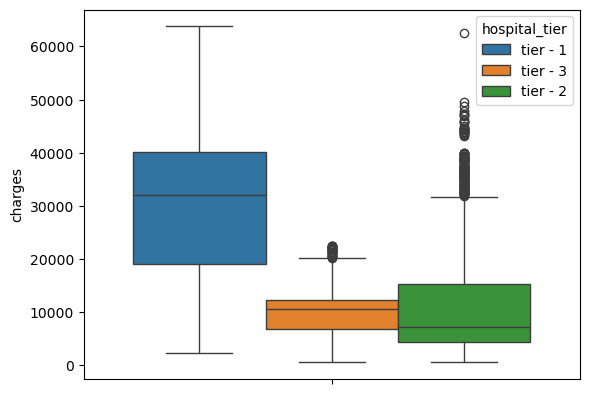

In [108]:
sns.boxplot(data=visual_df, y='charges',hue='hospital_tier')

<Axes: xlabel='charges', ylabel='Count'>

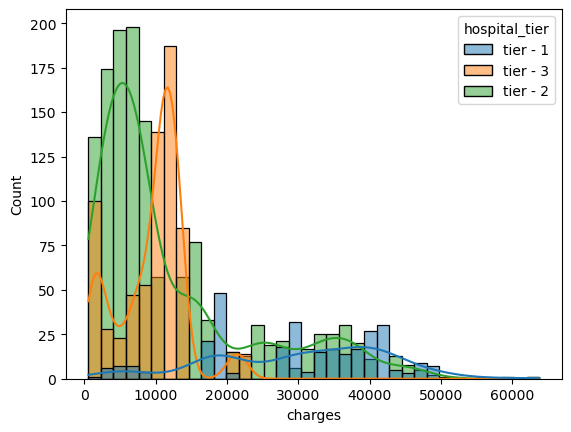

In [109]:
sns.histplot(data=visual_df, x='charges',kde=True,hue='hospital_tier')

<Axes: ylabel='charges'>

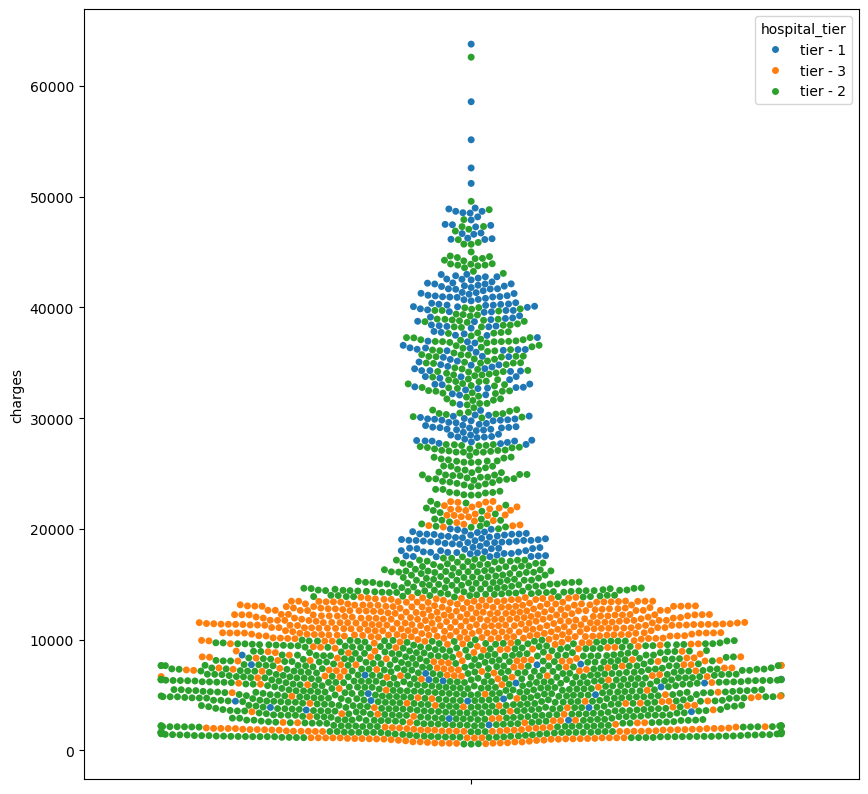

In [110]:
plt.figure(figsize=(10,10))
sns.swarmplot(data=visual_df, y='charges',hue='hospital_tier')

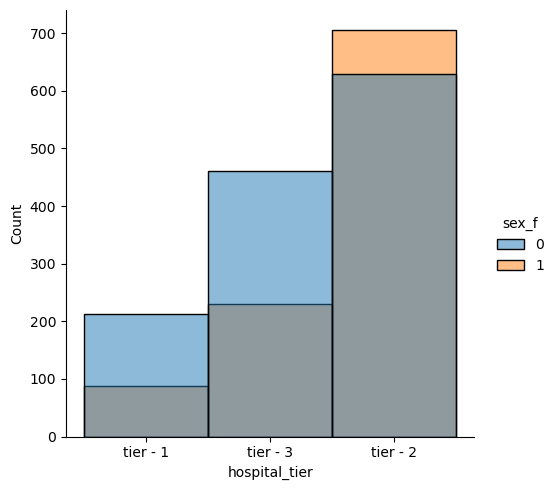

In [111]:
sns.displot(data=visual_df, x='hospital_tier', hue='sex_f')

<Axes: xlabel='sex_f', ylabel='hospital_tier'>

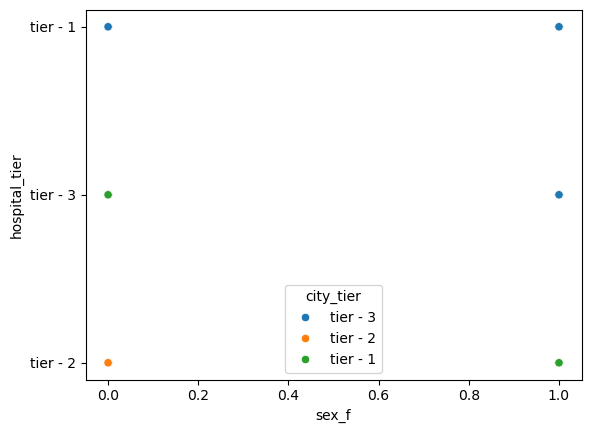

In [112]:
sns.scatterplot(data=visual_df, x='sex_f', y='hospital_tier', hue='city_tier')

# Machine Learning

<Axes: >

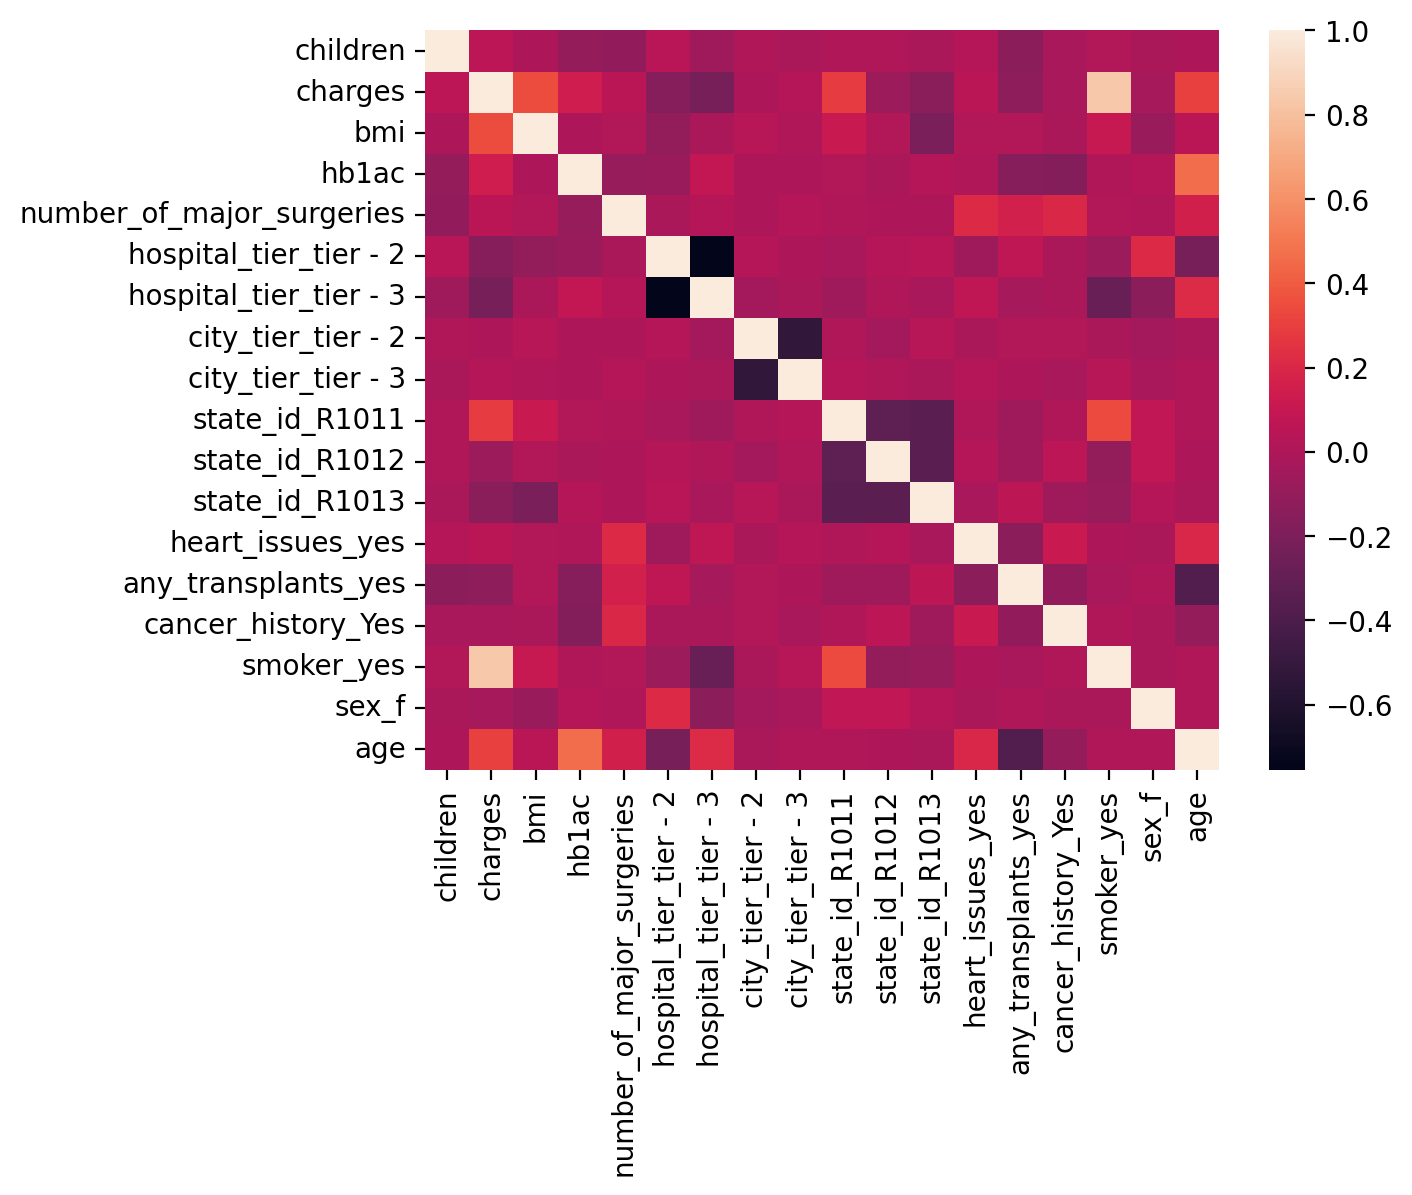

In [121]:
plt.figure(dpi=200)
sns.heatmap(df.corr())

In [122]:
X= df.drop('charges',axis=1)
y= df['charges']

In [123]:
X_train,X_test,y_train,y_test= tts(X,y,random_state=101,test_size=0.2)

In [124]:
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [125]:
def model_report(model,param_grid,X_train,X_test,y_train,y_test):
    from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
    import numpy as np
    from sklearn.model_selection import GridSearchCV, KFold
    import warnings
    warnings.filterwarnings("ignore")
    kf= KFold(n_splits=5, shuffle=True, random_state=101)
    grid= GridSearchCV(model, param_grid, cv=kf ,n_jobs=-1,scoring='neg_root_mean_squared_error')
    grid.fit(X_train, y_train)
    y_pred_test= grid.predict(X_test)
    y_pred_train= grid.predict(X_train)

    print('Testing Accuracy')
    print(f'R2_Score {r2(y_test,y_pred_test)}')
    print(f'MAE {mae(y_test,y_pred_test)}')
    print(f'RMSE {np.sqrt(mse(y_test,y_pred_test))}')
    print('\nTraining Accuracy')
    print(f'R2_Score {r2(y_train,y_pred_train)}')
    print(f'MAE {mae(y_train,y_pred_train)}')
    print(f'RMSE {np.sqrt(mse(y_train,y_pred_train))}')
    return grid

In [126]:
log_param_grid= {}
lasso_param_grid= {'alpha':np.append(np.linspace(0,1,11),np.arange(2,10)),'max_iter':[10000]}
ridge_param_grid= {'alpha':np.append(np.linspace(0,1,11),np.arange(2,10)),'max_iter':[10000]}
dtr_param_grid= {'max_depth':np.append(np.arange(3,10),[None]),'random_state':[101]}
rfr_param_grid= {'n_estimators':[64,100,128,200],'oob_score':[True],'max_depth':np.arange(3,11)}
gbr_param_grid= {'n_estimators':[64,100,128,200],'learning_rate':np.append(np.linspace(0,1,11),np.arange(2,10)),'max_depth':np.arange(3,6)}
abr_param_grid= {'n_estimators':[64,100,128,200],'learning_rate':np.append(np.linspace(0,1,11),np.arange(2,10))}

In [127]:
log_grid= model_report(LinearRegression(), log_param_grid, X_train, X_test, y_train, y_test)

Testing Accuracy
R2_Score 0.8857992394780354
MAE 2307.340845402307
RMSE 3951.032129428956

Training Accuracy
R2_Score 0.8569607769385613
MAE 2740.628641963824
RMSE 4500.6305898959745


In [141]:
lasso_grid= model_report(Lasso(), lasso_param_grid, X_train, X_test, y_train, y_test)

Testing Accuracy
R2_Score 0.8861807004407325
MAE 2301.292390261763
RMSE 3944.4278598864703

Training Accuracy
R2_Score 0.8569396245222223
MAE 2738.130169916159
RMSE 4500.963350696722


In [142]:
ridge_grid= model_report(Ridge(), ridge_param_grid, X_train, X_test, y_train, y_test)

Testing Accuracy
R2_Score 0.885821652847875
MAE 2313.465043180549
RMSE 3950.644389936472

Training Accuracy
R2_Score 0.8569414569259571
MAE 2747.3554664077274
RMSE 4500.934525075242


In [143]:
dtr_grid= model_report(DecisionTreeRegressor(), dtr_param_grid, X_train, X_test, y_train, y_test)

Testing Accuracy
R2_Score 0.9193913987097015
MAE 2065.2925565905457
RMSE 3319.454774118686

Training Accuracy
R2_Score 0.9181643756479387
MAE 2045.297686507041
RMSE 3404.2151212300723


In [144]:
rfr_grid= model_report(RandomForestRegressor(), rfr_param_grid, X_train, X_test, y_train, y_test)

Testing Accuracy
R2_Score 0.9280843025604071
MAE 1755.5142270930166
RMSE 3135.363596325169

Training Accuracy
R2_Score 0.9696516101057041
MAE 1177.606817089206
RMSE 2073.0683626895184


In [145]:
abr_grid= model_report(AdaBoostRegressor(), abr_param_grid, X_train, X_test, y_train, y_test)

Testing Accuracy
R2_Score 0.8718635245513741
MAE 3311.6878654713814
RMSE 4185.163704613483

Training Accuracy
R2_Score 0.8649501331656961
MAE 3489.1246358418157
RMSE 4373.134921441042


In [149]:
gbr_grid= model_report(GradientBoostingRegressor(), gbr_param_grid, X_train, X_test, y_train, y_test)

Testing Accuracy
R2_Score 0.9272106926739095
MAE 1853.2570677488209
RMSE 3154.34982941825

Training Accuracy
R2_Score 0.9415119405327935
MAE 1689.5980820412979
RMSE 2877.924541416185


In [152]:
print(gbr_grid.best_params_)
print(gbr_grid.best_estimator_.feature_importances_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 64}
[1.33556328e-02 1.15160031e-01 4.36994950e-03 1.69336574e-04
 2.97903979e-03 1.26186391e-02 2.70872480e-04 2.43991758e-05
 7.55638395e-03 8.15178587e-04 6.44615291e-03 1.47317973e-04
 3.40229051e-05 2.96280798e-04 7.41867931e-01 1.03410456e-03
 9.28547275e-02]


In [153]:
df_importance_features=  pd.DataFrame({'Features':df.drop('charges',axis=1).columns,'Features_Importance':gbr_grid.best_estimator_.feature_importances_})
df_importance_features

,Features,Features_Importance
0,children,0.013356
1,bmi,0.115160
2,hb1ac,0.004370
3,number_of_major_surgeries,0.000169
4,hospital_tier_tier - 2,0.002979
5,hospital_tier_tier - 3,0.012619
6,city_tier_tier - 2,0.000271
7,city_tier_tier - 3,0.000024
8,state_id_R1011,0.007556
9,state_id_R1012,0.000815


In [154]:
gbr_grid.predict(np.array([2,29.4,5.8,0,0,0,0,0,1,0,0,0,0,1,1,1,35]).reshape(1,-1))

array([47912.72454979])